In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
# Install pyarrow to work with feather data 
# !pip install pyarrow

## Reading and Cleaning the data

In [36]:
all_data = pd.read_feather(r"Sales_data.ftr")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [37]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [38]:
# removing all the rows with any null values from the data 

all_data = all_data.dropna(how='all')
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [39]:
# dropping the duplicated columns which even have same order ID

all_data.duplicated().sum() 


618

In [40]:
final_data = all_data.drop_duplicates()
final_data.duplicated().sum()

0

## Finding best month for sale

In [41]:
# creating a separate month column for ease 

def month(dt):
    return dt.split('/')[0]

final_data['Month'] = final_data['Order Date'].apply(month) 
final_data['Month'].unique()

#there is unwanted value 'Order Date' in the data which we dont want so we create a filter

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [42]:
final_data = final_data[final_data['Month']!='Order Date']
final_data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [43]:
final_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [44]:
final_data['Month'] = final_data['Month'].astype(int)
final_data['Quantity Ordered'] = final_data['Quantity Ordered'].astype(float)
final_data['Price Each'] = final_data['Price Each'].astype(float)

final_data.dtypes


Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [45]:
final_data['Sales'] = final_data['Quantity Ordered'] * final_data['Price Each']
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


<Axes: xlabel='Month'>

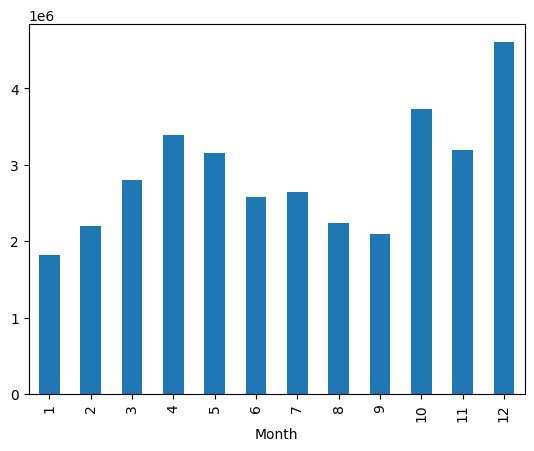

In [46]:
final_data.groupby(['Month'])['Sales'].sum().plot(kind='bar')

## Determining city giving maximum sales to the brand

In [47]:
def get_city(addr):
    return addr.split(',')[1]

In [48]:
final_data['City'] = final_data['Purchase Address'].apply(get_city)
final_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


<Axes: ylabel='City'>

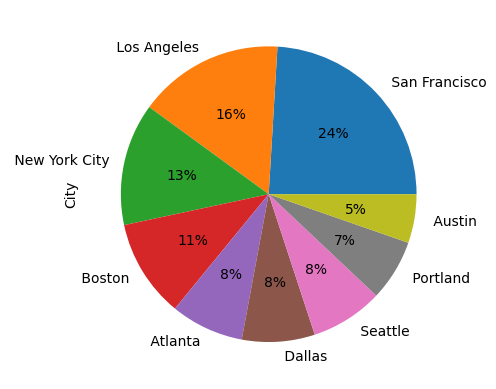

In [49]:
pd.value_counts(final_data['City']).plot(kind='pie' , autopct = '%1.0f%%') 

## What are most sold products and why

In [50]:
product_sales = final_data.groupby(['Product']).agg({'Quantity Ordered':'sum' , 'Price Each':'mean'})
product_sales = product_sales.reset_index()
product_sales


,Product,Quantity Ordered,Price Each
0,20in Monitor,4126.0,109.99
1,27in 4K Gaming Monitor,6239.0,389.99
2,27in FHD Monitor,7541.0,149.99
3,34in Ultrawide Monitor,6192.0,379.99
4,AA Batteries (4-pack),27615.0,3.84
5,AAA Batteries (4-pack),30986.0,2.99
6,Apple Airpods Headphones,15637.0,150.00
7,Bose SoundSport Headphones,13430.0,99.99
8,Flatscreen TV,4813.0,300.00
9,Google Phone,5529.0,600.00


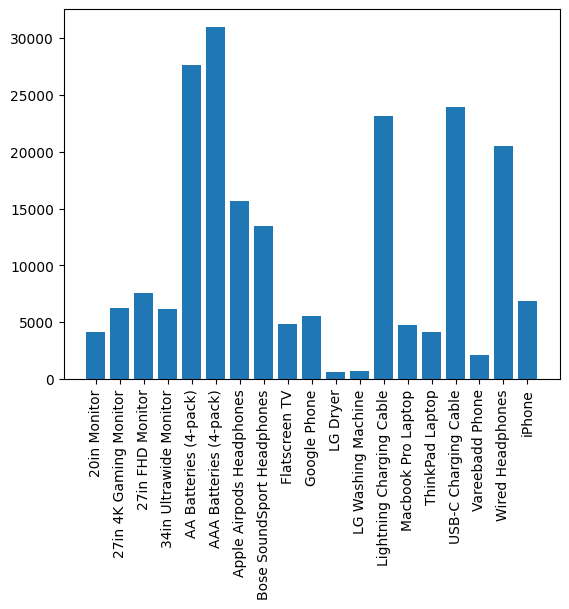

In [51]:
plt.bar(product_sales['Product'],product_sales['Quantity Ordered'])
plt.xticks(rotation=90)
plt.show()

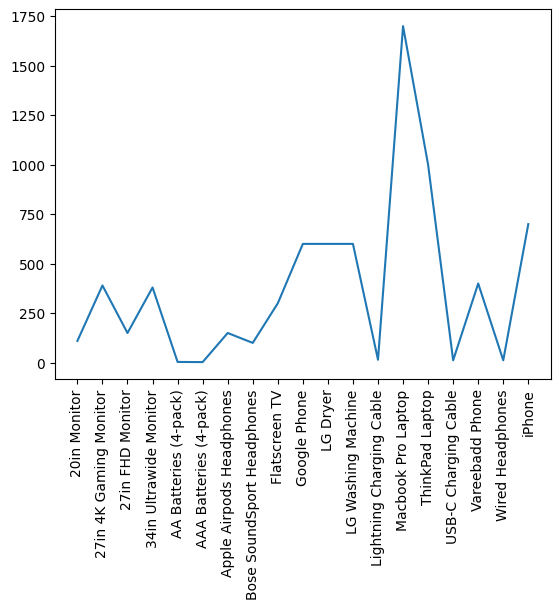

In [52]:
plt.plot(product_sales['Product'],product_sales['Price Each'])
plt.xticks(rotation=90)
plt.show()

Text(0, 0.5, 'Avg price of product')

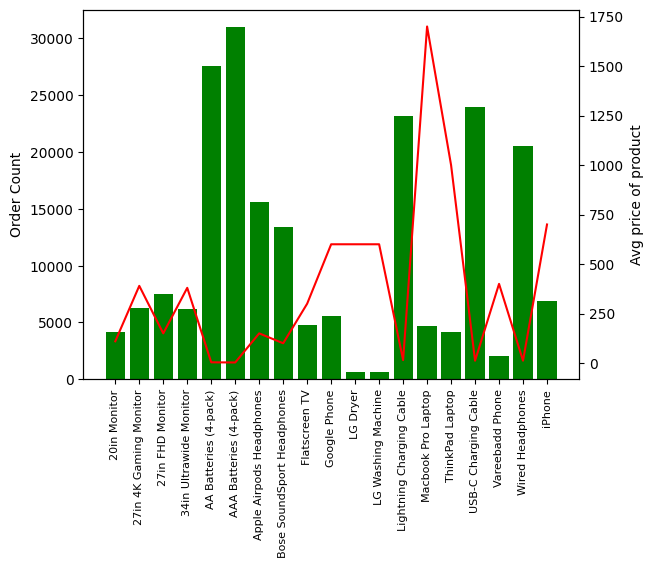

In [53]:
# Combining these two graphs 

fig , ax1 = plt.subplots()

ax2 = ax1.twinx() ## as X-axis is same for both plots , ie we are sharing x-axis , ie we have to use ax2 = ax1.twinx()

ax1.bar(product_sales['Product'], product_sales['Quantity Ordered'] , color='g')
ax2.plot(product_sales['Product'] , product_sales['Price Each'], color='r')

ax1.set_xticklabels(product_sales['Product'].unique() , rotation='vertical' , fontsize=8 )

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

## Understanding trend of most sold product

In [54]:
top_5 = final_data['Product'].value_counts()[0:5].index
top_5

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [55]:
top_5_data = final_data[final_data['Product'].isin(top_5)]
top_5_data.head()
# top_10_data.columns

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [56]:
top_5_data.groupby(['Month', 'Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

<Axes: xlabel='Month'>

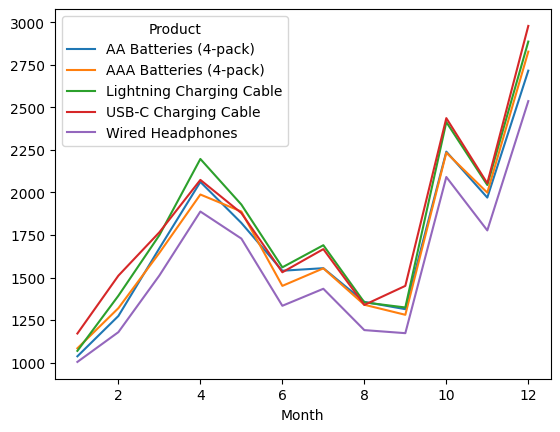

In [57]:
pivot = top_5_data.groupby(['Month' , 'Product']).size().unstack()
pivot.plot()


## Products sold together 

In [58]:
multiple_prod_orders = final_data[final_data['Order ID'].duplicated(keep=False)] # this will mark duplicate rows as True and  unique ones as False
                                                          # so giving us only order IDs with more than 1 products bought
multiple_prod_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2.0,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [59]:
grouped_prods = multiple_prod_orders.groupby(['Order ID'])['Product'].apply(lambda x:','.join(x)).reset_index().rename(columns={'Product':'grouped_products'})
grouped_prods

,Order ID,grouped_products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


<Axes: title={'center': 'Products frequently bought together'}, ylabel=' '>

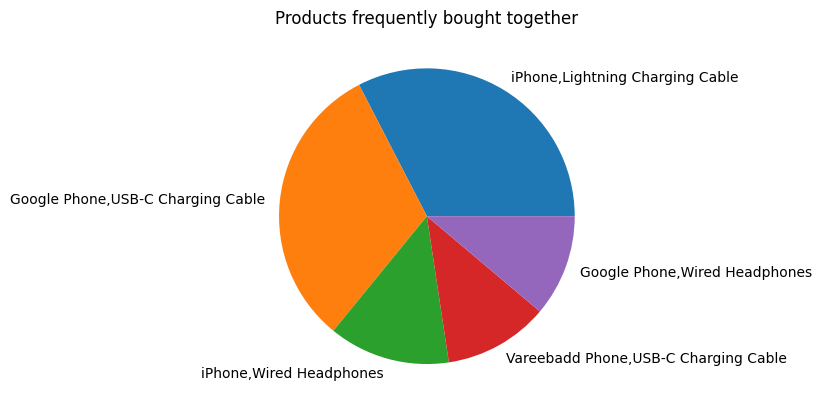

In [60]:
grouped_prods['grouped_products'].value_counts()[0:5].plot.pie(title='Products frequently bought together', ylabel=' ')
